## Example Data Notebook for TAQ Database

This notebook walks through how to access the TAQ-Clickhouse database remotely through SCP which is utilized for file transfer.

In [1]:
from pathlib import Path
import importlib.util
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from data_preprocessing.get_data import get_trades, get_quotes, get_ref

### Setup Credentials for Remote Access


In [2]:
# Define the absolute path to the module
module_path = Path('data_preprocessing/get_data.py')

# Ensure the module file exists
assert module_path.is_file(), f"File does not exist: {module_path}"

# Use importlib to load the module
spec = importlib.util.spec_from_file_location("get_data", module_path)
get_data = importlib.util.module_from_spec(spec)
spec.loader.exec_module(get_data)

### Sample Trade Query

In [3]:
symbols = ["DIA"]
start_date = "2020-01-06"
end_date = "2020-01-07"
row_limit = "50"

get_trades(symbols, start_date, end_date, row_limit)

Output for symbol DIA:


In [ ]:
data=pd.read_csv('data/trades_DIA_20200106-20200107.csv.gz', compression='gzip')
data.head(5)
data['Time']=pd.to_datetime(data['Time'])

: 

: 

: 

: 

: 

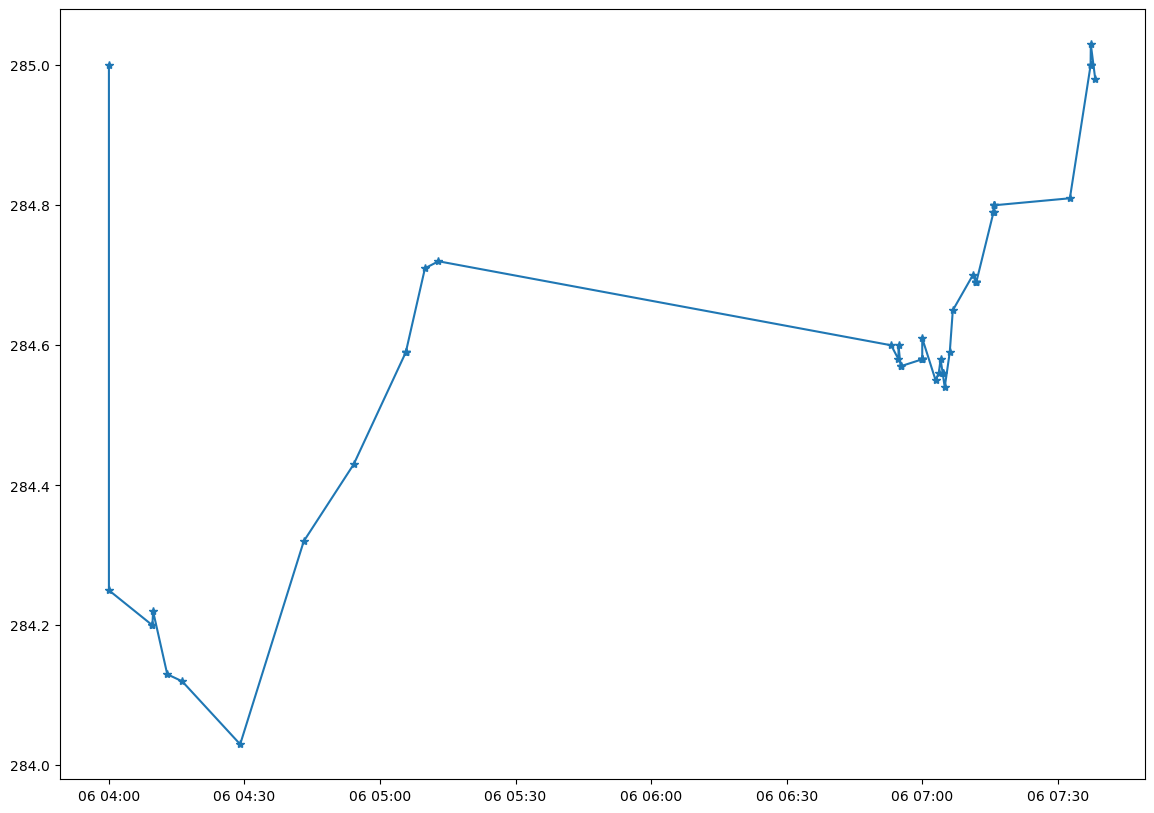

: 

: 

: 

In [ ]:
fig,ax=plt.subplots(figsize=(14,10))
ax.plot(data['Time'],data['Trade_Price'],marker='*')

### Error for missing data

Be careful, despite the error being populated, the last file saved on the server will still be transferred to your local machine



In [ ]:
symbols = ["DIA"]
start_date = "2020-01-05"
end_date = "2020-01-06"
row_limit = "50"

get_trades(symbols, start_date, end_date, row_limit)

Output for symbol DIA:
... No data found for DIA between 2020-01-05 and 2020-01-06.
Errors for symbol DIA:


: 

: 

: 

### Larger Row Limit

In [ ]:
symbols = ["DIA"]
start_date = "2020-01-06"
end_date = "2020-01-07"
row_limit = "1000000"

get_trades(symbols, start_date, end_date, row_limit)

Output for symbol DIA:
Errors for symbol DIA:


: 

: 

In [ ]:
data=pd.read_csv('data/trades_DIA_20200106-20200107.csv.gz', compression='gzip')
data.head(5)
data['Time']=pd.to_datetime(data['Time'])

: 

: 

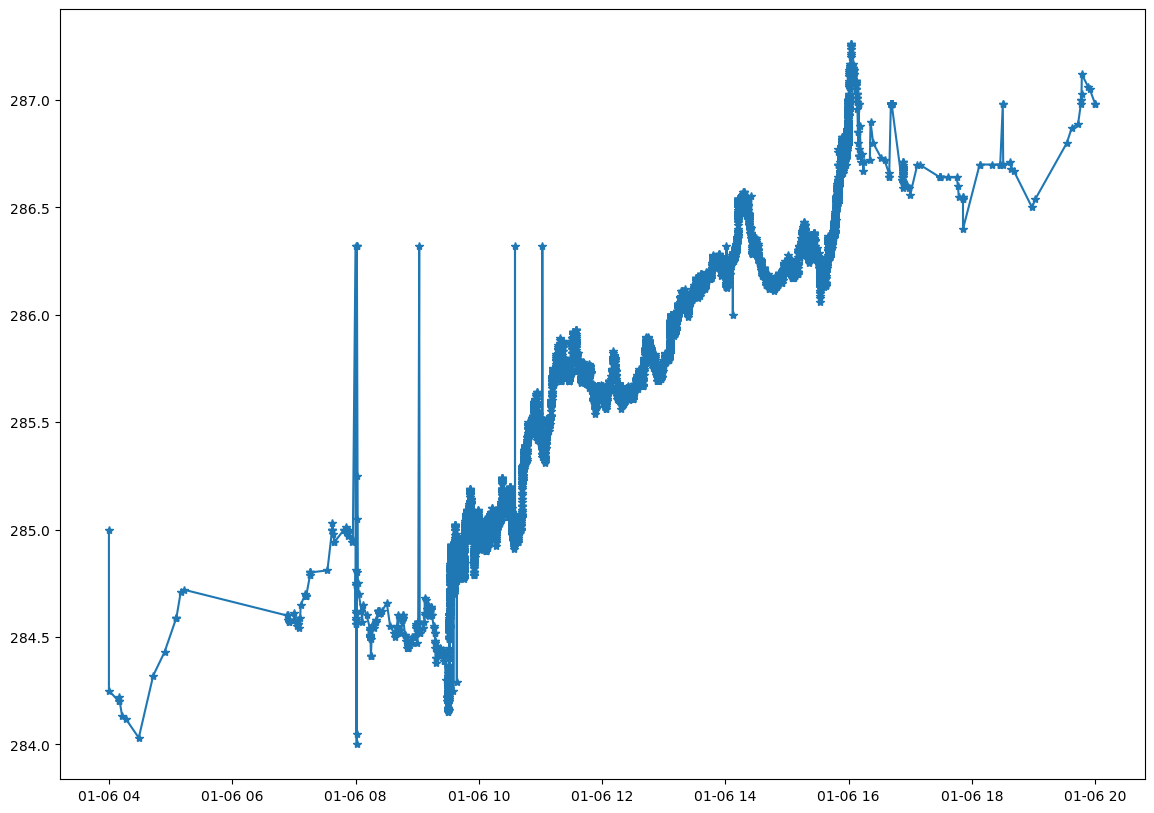

: 

: 

In [ ]:
fig,ax=plt.subplots(figsize=(14,10))
ax.plot(data['Time'],data['Trade_Price'],marker='*')

### Multiple Days Fixed Symbol

In [ ]:
symbols = ["AAPL"]
start_date = "2022-01-05"
end_date = "2022-01-06"
row_limit = "1000000000"

get_trades(symbols, start_date, end_date, row_limit)

Output for symbol AAPL:
Errors for symbol AAPL:


: 

: 

In [ ]:
data=pd.read_csv('data/trades_DIA_20200106-20200110.csv.gz', compression='gzip')
data.head(5)
data['Time']=pd.to_datetime(data['Time'])

: 

: 

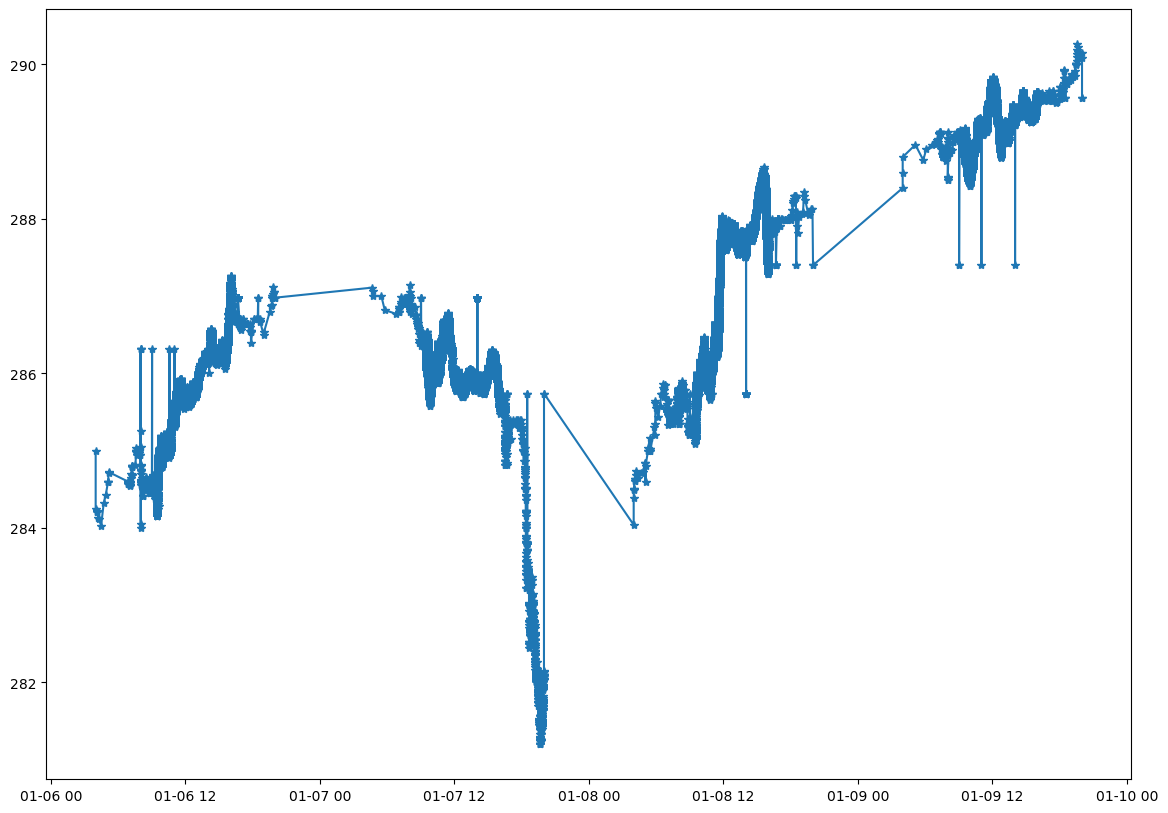

: 

: 

In [ ]:
fig,ax=plt.subplots(figsize=(14,10))
ax.plot(data['Time'],data['Trade_Price'],marker='*')

### Single Day Multiple Symbols

In [ ]:
symbols = ["DIA","AAPL"]
start_date = "2020-01-06"
end_date = "2020-01-07"
row_limit = "1000000"

get_trades(symbols, start_date, end_date, row_limit)

Output for symbol DIA:
Errors for symbol DIA:
Output for symbol AAPL:
Errors for symbol AAPL:


: 

: 

### Quotes Data

In [ ]:
symbols = ["AAPL"]
start_date = "2022-01-03"
end_date = "2022-01-04"
row_limit = "10000"

get_quotes(symbols, start_date, end_date, row_limit)

Output for symbol AAPL:


KeyboardInterrupt: 

: 

: 

In [ ]:
data=pd.read_csv('data/quotes_AAPL_20200106-20200107.csv.gz', compression='gzip')
data.head(5)
data['Time']=pd.to_datetime(data['Time'])

: 

: 

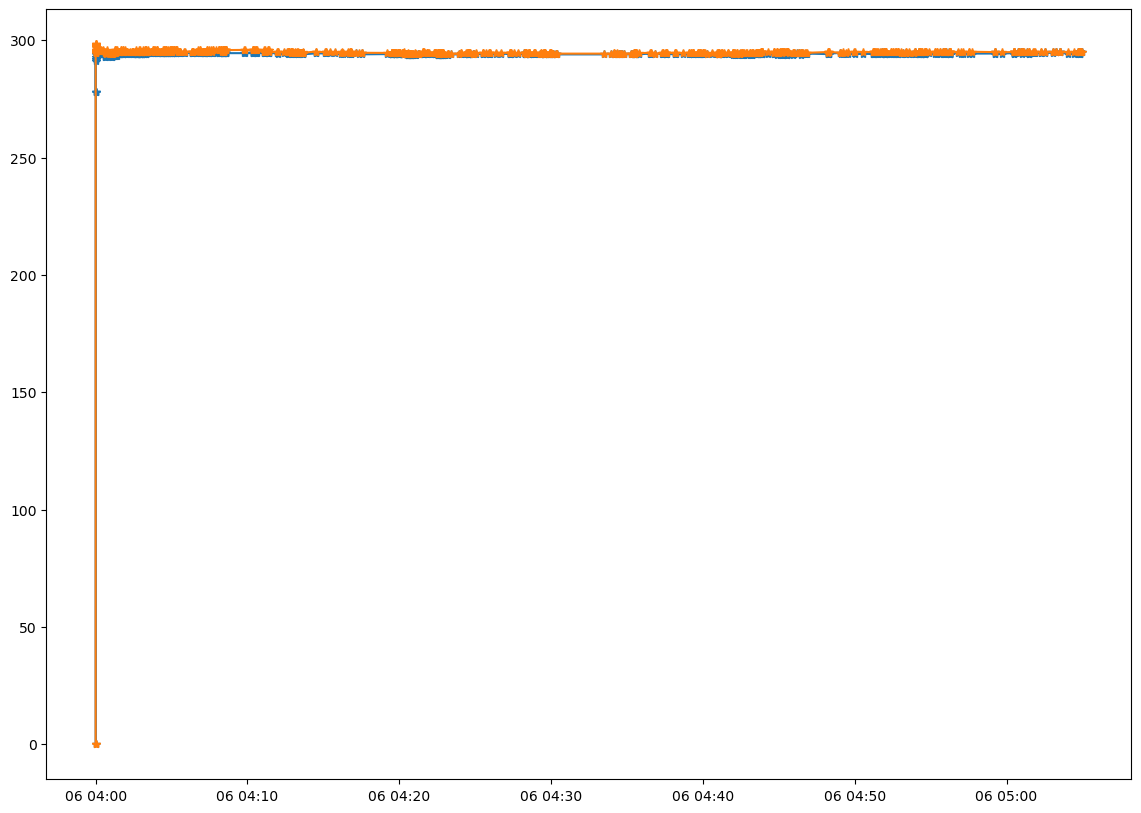

: 

: 

In [ ]:
fig,ax=plt.subplots(figsize=(14,10))
ax.plot(data['Time'],data['Bid_Price'],marker='*')
ax.plot(data['Time'],data['Offer_Price'],marker='*')

### Reference Data Access

In [ ]:
symbols = ["GME","AMC"]
start_date = "2019-01-01"
end_date = "2019-02-01"
row_limit = "100000"

get_ref(symbols, start_date, end_date, row_limit)

Output for symbol GME:
Errors for symbol GME:
Output for symbol AMC:
Errors for symbol AMC:


: 

: 

: 

: 